In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/drive/MyDrive/데이콘/전기차 가격 예측 해커톤/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/전기차 가격 예측 해커톤/test.csv')

# EDA

In [ ]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [ ]:
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        846 non-null    object 
 1   제조사       846 non-null    object 
 2   모델        846 non-null    object 
 3   차량상태      846 non-null    object 
 4   배터리용량     542 non-null    float64
 5   구동방식      846 non-null    object 
 6   주행거리(km)  846 non-null    int64  
 7   보증기간(년)   846 non-null    int64  
 8   사고이력      846 non-null    object 
 9   연식(년)     846 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 66.2+ KB


In [ ]:
train.describe()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [ ]:
train.describe(include='O')

,ID,제조사,모델,차량상태,구동방식,사고이력
count,7497,7497,7497,7497,7497,7497
unique,7497,7,21,3,3,2
top,TRAIN_0000,H사,ID4,Brand New,AWD,No
freq,1,1237,605,3380,5167,7154


In [ ]:
train.isnull().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,2711
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


In [ ]:
train['모델'].value_counts()

,count
모델,
ID4,605
i5,414
Niro,398
Soul,397
i3,388
RSeTGT,385
eT,379
ION6,379
Q4eT,378


In [ ]:
train_matrix = train.corr(numeric_only=True)
train_matrix['가격(백만원)'].sort_values(ascending=False)

,가격(백만원)
가격(백만원),1.000000
배터리용량,0.431668
주행거리(km),-0.035488
연식(년),-0.058455
보증기간(년),-0.349962


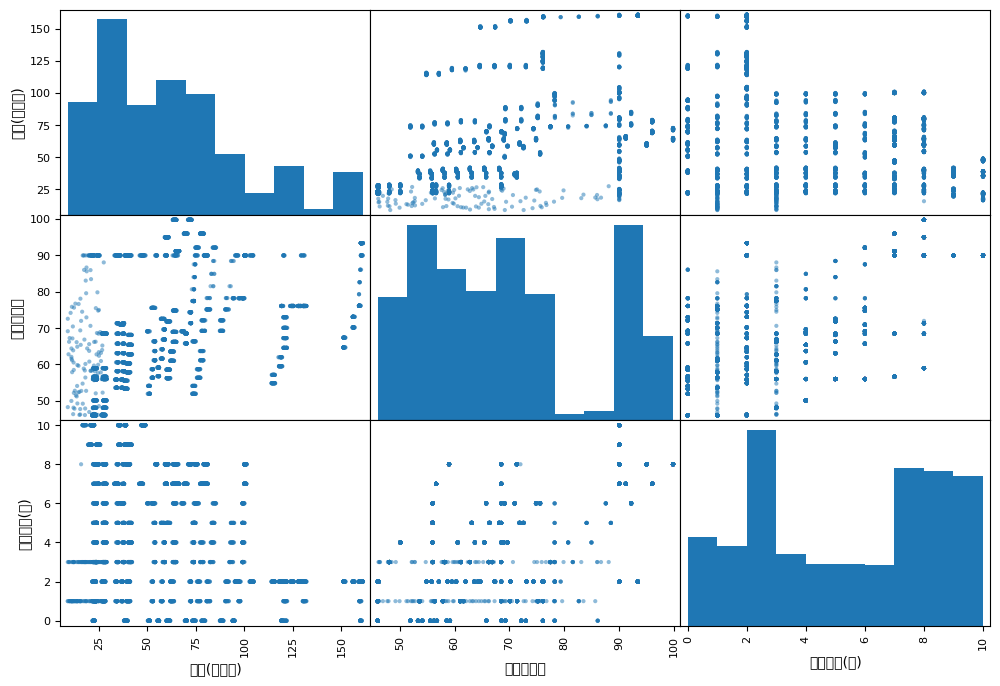

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train[['가격(백만원)','배터리용량','보증기간(년)']], figsize=(12,8))
plt.show()

In [ ]:
# 수치형 데이터만 선택
numeric_df = train.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

correlation_matrix

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


# 전처리

In [ ]:
# 결측치 0로 대체
train['배터리용량'] = train['배터리용량'].fillna(0)
test['배터리용량'] = test['배터리용량'].fillna(0)

In [ ]:
# MX 배터리용량 결측치 보증기간별 배터리용량 평균으로 대체
# 보증기간 4년은 모두 결측치라 3년과 5년 평균의 중간값으로 대체

MX_NN_3btmean =  train[(train['모델']=='MX')  & (train['보증기간(년)']==3) & train['배터리용량']>0]['배터리용량'].mean()
train.loc[(train['모델']=='MX')  & (train['보증기간(년)']==3) & (train['배터리용량']==0), '배터리용량'] = MX_NN_3btmean

MX_NN_5btmean =  train[(train['모델']=='MX')  & (train['보증기간(년)']==5) & train['배터리용량']>0]['배터리용량'].mean()
train.loc[(train['모델']=='MX')  & (train['보증기간(년)']==5) & (train['배터리용량']==0), '배터리용량'] = MX_NN_5btmean

MX_NN_4btmean = MX_NN_3btmean + (MX_NN_5btmean - MX_NN_3btmean)/2
train.loc[(train['모델']=='MX')  & (train['보증기간(년)']==4) & (train['배터리용량']==0), '배터리용량'] = MX_NN_4btmean

MX_NN_2btmean = MX_NN_3btmean - (MX_NN_5btmean - MX_NN_3btmean)/2
train.loc[(train['모델']=='MX')  & (train['보증기간(년)']==2) & (train['배터리용량']==0), '배터리용량'] = MX_NN_2btmean

In [ ]:
# TayGTS 결측치 차량상태, 보증기간별 배터리용량 평균값으로 대체

TayGTS_BN_90o_2btmean = train[(train['모델']=='TayGTS') & (train['차량상태']=='Brand New') & (train['보증기간(년)']==2) & (train['배터리용량']>=90)]['배터리용량'].mean()
train.loc[(train['모델']=='TayGTS') & (train['차량상태']=='Brand New') & (train['보증기간(년)']==2) & (train['배터리용량'] <= 90), '배터리용량'] = TayGTS_BN_90o_2btmean
test.loc[(test['모델']=='TayGTS') & (test['차량상태']=='Brand New') & (test['보증기간(년)']==2) & (test['배터리용량'] <= 90), '배터리용량'] = TayGTS_BN_90o_2btmean

TayGTS_NN_70o_2btmean = train[(train['모델']=='TayGTS') & (train['차량상태']=='Nearly New') & (train['보증기간(년)']==2) & (train['배터리용량']>=70)]['배터리용량'].mean()
train.loc[(train['모델']=='TayGTS') & (train['차량상태']=='Nearly New') & (train['보증기간(년)']==2) & (train['배터리용량'] <= 70), '배터리용량'] = TayGTS_NN_70o_2btmean
test.loc[(test['모델']=='TayGTS') & (test['차량상태']=='Nearly New') & (test['보증기간(년)']==2) & (test['배터리용량'] <= 70), '배터리용량'] = TayGTS_NN_70o_2btmean

TayGTS_NN_80o_1btmean = train[(train['모델']=='TayGTS') & (train['차량상태']=='Nearly New') & (train['보증기간(년)']==1) & (train['배터리용량']>=80)]['배터리용량'].mean()
train.loc[(train['모델']=='TayGTS') & (train['차량상태']=='Nearly New') & (train['보증기간(년)']==1) & (train['배터리용량']<=80), '배터리용량'] = TayGTS_NN_80o_1btmean
test.loc[(train['모델']=='TayGTS') & (test['차량상태']=='Nearly New') & (test['보증기간(년)']==1) & (test['배터리용량']<=80), '배터리용량'] = TayGTS_NN_80o_1btmean

TayGTS_NN_80o_0btmean = train[(train['모델']=='TayGTS') & (train['차량상태']=='Nearly New') & (train['보증기간(년)']==0) & (train['배터리용량']>=80)]['배터리용량'].mean()
train.loc[(train['모델']=='TayGTS') & (train['차량상태']=='Nearly New') & (train['보증기간(년)']==0) & (train['배터리용량']<=80), '배터리용량'] = TayGTS_NN_80o_0btmean
test.loc[(test['모델']=='TayGTS') & (test['차량상태']=='Nearly New') & (test['보증기간(년)']==0) & (test['배터리용량']<=80), '배터리용량'] = TayGTS_NN_80o_0btmean

In [ ]:
# 타겟 데이터 분리
target = train.pop('가격(백만원)')
#target_transformed = np.log(target + 1)

In [ ]:
# 컬럼명 변경, ID 제거
df = pd.concat([train,test])
df.rename(columns={'주행거리(km)':'주행거리', '보증기간(년)':'보증기간', '연식(년)':'연식'}, inplace=True)
df = df.drop(['ID'], axis=1)
train = df.iloc[:len(train)]
test = df.iloc[len(train):]

In [ ]:
column_names = train.columns.tolist()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
     [('scaling', StandardScaler(), ['배터리용량','보증기간','주행거리','연식']),
     ('ordinalEncoder', OrdinalEncoder(), ['제조사','모델','차량상태','구동방식','사고이력'])]
)
ct.fit(train)
train = ct.transform(train)
test = ct.transform(test)

print(train.shape, test.shape)

(7497, 9) (846, 9)


In [ ]:
train = pd.DataFrame(data=train, columns=column_names)

In [ ]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, random_state=0, test_size=0.3, stratify=train['모델'])
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(5247, 9) (2250, 9) (5247,) (2250,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error
import lightgbm as lgb
import xgboost as xgb
xgbm = xgb.XGBRegressor(random_state=0)
lgbm = lgb.LGBMRegressor(random_state=0, verbose=-1)
rf = RandomForestRegressor(random_state=0)

model_list = [rf, lgbm, xgbm]
for md in model_list:
  md.fit(X_tr, y_tr)
  y_pred = md.predict(X_val)
  rmse = -cross_val_score(md, X_tr, y_tr, scoring='neg_root_mean_squared_error', cv=3)
  print('RMSE:', rmse.mean())

RMSE: 1.4304323754714083
RMSE: 1.3599038228559832
RMSE: 1.4388784308280007


In [ ]:
# 예측 및 저장
pred = xgbm.predict(test)
#pred_transformed = np.exp(pred) - 1
submit = pd.DataFrame({"ID": range(0, 846), '가격(백만원)': pred})
submit['ID'] = [f"TEST_{i:03}" for i in range(0, 846)]
submit.to_csv('xgb.csv', index=False)

In [ ]:
ttest = pd.read_csv('xgb.csv')
ttest

,ID,가격(백만원)
0,TEST_000,130.561370
1,TEST_001,80.242250
2,TEST_002,65.438070
3,TEST_003,35.090836
4,TEST_004,47.869358
...,...,...
841,TEST_841,151.370540
842,TEST_842,38.659573
843,TEST_843,38.292076
844,TEST_844,58.846077
